In [38]:
import numpy.random as random
import numpy as np
import pandas as pd
from IPython.core.display_functions import display

#np.random.seed(42)

In [39]:
n = 100
mA = [1.0, 1.0]
mB = [-1, -1]
sigmaA = 0.5
sigmaB = 0.5

classA = np.vstack((random.randn(1,n) * sigmaA + mA[0], 
          random.randn(1,n) * sigmaA + mA[1]))
tA = np.ones((1,100))

classB = np.vstack((random.randn(1,n) * sigmaB + mB[0], 
          random.randn(1,n) * sigmaB + mB[1]))
tB = -np.ones((1,100))
tB_p = np.zeros((1,100))

data = np.concatenate((classA, classB), axis=1)
data = np.vstack((data, np.ones((1, 200))))

tdata = np.concatenate((tA, tB), axis=1)


def step(X):
  X[X > 0] = 1
  X[X < 0] = 0
  return X


def shuffle(X, y):
  data = np.vstack((X, y))
  trans = data.T
  random.shuffle(trans)
  data = trans.T

  Xnew = data[0:3,:]
  ynew = data[3,:]

  y_delta = ynew.copy()
  y_perceptron = step(ynew)
  return Xnew, y_delta, y_perceptron

X, y_delta, y_perceptron = shuffle(data, tdata)


#display(pd.DataFrame(y_delta))
#display(pd.DataFrame(y_perceptron))

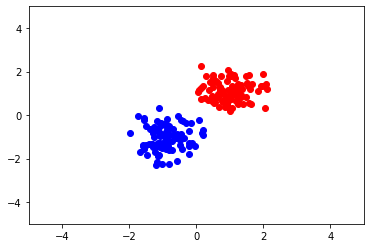

(2, 100)

In [40]:
import matplotlib.pyplot as plt
plt.scatter(classA[0,:], classA[1,:], c="red")
plt.scatter(classB[0,:], classB[1,:], c="blue")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
display(classA.shape)

In [41]:

epochs = 50

def init_weights(shape):
  #return -np.ones(shape)
  return np.random.random_sample(shape)

pre_initialized_weights = -1.5 * init_weights((1,3)) + np.array((3,0,0))

def step(X):
  X[X > 0] = 1
  X[X < 0] = 0
  return X

def eval_error(X, weights, y_true):
  y_pred = weights @ X
  error = np.sum((y_true - y_pred)**2/2)
  error = round(error, 2)
  return error

def eval_misclassifications(X, weights, y_true):
  y_pred = weights @ X
  y_pred = step(y_pred)
  res = y_pred != y_true
  return np.sum(res)

def plot(classA, classB, weights):
  x = np.linspace(-3, 3, 100)
  y = -weights[0][0]/weights[0][1] * x - weights[0][2]/weights[0][1]

  plt.scatter(classA[0,:], classA[1,:], c="red", label="classA")
  plt.scatter(classB[0,:], classB[1,:], c="blue", label="classB")
  plt.plot(x, y, label="Decision Boundary")
  plt.xlim(-4, 4)
  plt.ylim(-4, 4)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

78


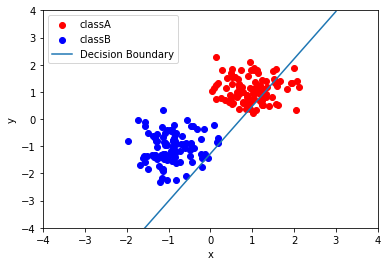

After 1 0/200 11.14
After 2 0/200 11.06
After 3 0/200 11.06
After 4 0/200 11.06
After 5 0/200 11.06
After 6 0/200 11.06
After 7 0/200 11.06
After 8 0/200 11.06
After 9 0/200 11.06
After 10 0/200 11.06
After 11 0/200 11.06
After 12 0/200 11.06
After 13 0/200 11.06
After 14 0/200 11.06
After 15 0/200 11.06
After 16 0/200 11.06
After 17 0/200 11.06
After 18 0/200 11.06
After 19 0/200 11.06
After 20 0/200 11.06
After 21 0/200 11.06
After 22 0/200 11.06
After 23 0/200 11.06
After 24 0/200 11.06
After 25 0/200 11.06
After 26 0/200 11.06
After 27 0/200 11.06
After 28 0/200 11.06
After 29 0/200 11.06
After 30 0/200 11.06
After 31 0/200 11.06
After 32 0/200 11.06
After 33 0/200 11.06
After 34 0/200 11.06
After 35 0/200 11.06
After 36 0/200 11.06
After 37 0/200 11.06
After 38 0/200 11.06
After 39 0/200 11.06
After 40 0/200 11.06
After 41 0/200 11.06
After 42 0/200 11.06
After 43 0/200 11.06
After 44 0/200 11.06
After 45 0/200 11.06
After 46 0/200 11.06
After 47 0/200 11.06
After 48 0/200 11.06
A

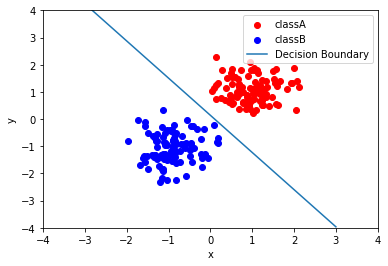

array([[ 0.49894334,  0.36475859, -0.05106421]])

In [58]:
learning_rate = 0.1

def delta(X, weights, t):
  return -learning_rate * ((weights @ X) - t) @ X.T

weights = pre_initialized_weights.copy()
print(eval_misclassifications(X, weights, y_perceptron))
online_errors = [eval_error(X, weights, y_delta)]

plot(classA, classB, weights)

## online
for epoch in range(1, epochs+1):
  #X, y_delta, y_perceptron = shuffle(data, tdata)
  for i, x in enumerate(X.T):
    x = x.reshape(3,1)
    weights += delta(x, weights, y_delta[i])
    mis = eval_misclassifications(X, weights, y_perceptron)
    error = eval_error(X, weights, y_delta)

    online_errors.append(error)
  #plot(classA, classB, weights)
  print("After", epoch, f"{mis}/{X.shape[1]}", error)

plot(classA, classB, weights)

display(weights)


78


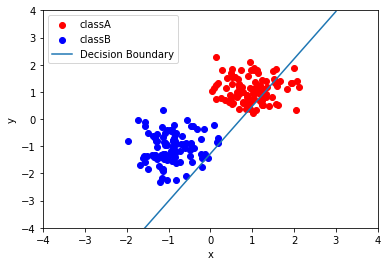

After 1 59/200 200.85
After 2 48/200 154.03
After 3 45/200 123.02
After 4 44/200 101.67
After 5 35/200 86.46
After 6 31/200 75.27
After 7 27/200 66.75
After 8 26/200 60.05
After 9 24/200 54.62
After 10 24/200 50.11
After 11 22/200 46.26
After 12 21/200 42.93
After 13 19/200 39.99
After 14 17/200 37.38
After 15 15/200 35.04
After 16 15/200 32.92
After 17 14/200 31.01
After 18 14/200 29.27
After 19 12/200 27.69
After 20 10/200 26.24
After 21 9/200 24.92
After 22 9/200 23.72
After 23 7/200 22.61
After 24 6/200 21.61
After 25 5/200 20.68
After 26 4/200 19.84
After 27 4/200 19.07
After 28 4/200 18.36
After 29 4/200 17.71
After 30 4/200 17.12
After 31 4/200 16.58
After 32 4/200 16.08
After 33 4/200 15.63
After 34 2/200 15.21
After 35 1/200 14.83
After 36 1/200 14.48
After 37 0/200 14.17
After 38 0/200 13.87
After 39 0/200 13.61
After 40 0/200 13.36
After 41 0/200 13.14
After 42 0/200 12.93
After 43 0/200 12.75
After 44 0/200 12.57
After 45 0/200 12.42
After 46 0/200 12.27
After 47 0/200 12.1

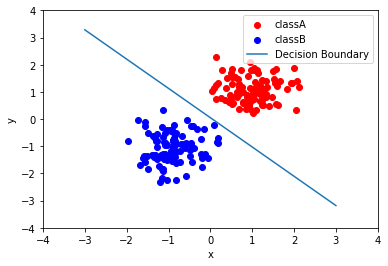

array([[ 0.46418026,  0.43073714, -0.02216436]])

In [59]:
learning_rate = 0.001
#does not converge for too high learning rate -> oscilates with lr=0.01

weights = pre_initialized_weights.copy()
print(eval_misclassifications(X, weights, y_perceptron))
batch_errors = [eval_error(X, weights, y_delta)]

plot(classA, classB, weights)

## batch
for epoch in range(1, epochs+1):
  weights += delta(X, weights, y_delta)
  mis = eval_misclassifications(X, weights, y_perceptron)
  error = eval_error(X, weights, y_delta)
  batch_errors.append(error)
  print("After", epoch, f"{mis}/{X.shape[1]}", error)
  #plot(classA, classB, weights)

plot(classA, classB, weights)
display(weights)


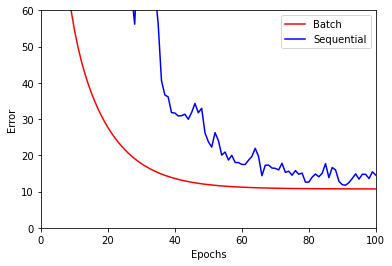

In [64]:
plt.plot(range(1, len(batch_errors)+1), np.array(batch_errors), c="red", label="Batch")
plt.plot(range(1, len(online_errors)+1), np.array(online_errors), c="blue", label="Sequential")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(0, 60)
plt.xlim(0, 100)
plt.legend()
plt.show()

Compare sequential with a batch learning approach for the delta rule. 

How quickly (in terms of epochs) do the algorithms converge?
-> depends on how bad the starting configuration was
Batch takes longer to converge.
Sequential always finishes in one epoch while batch needs many more.

Please adjust the learning rate and plot the learning curves for each variant. 
-> Batch mode is very sensible to learning rate changes. While online mode changes only convergence speed in range ~0.1-0.001. Batch mode oscilates for lr higher than ~0.003.


How sensitive is learning to random initialisation?
Random initialization slightly changes the amount of epochs.


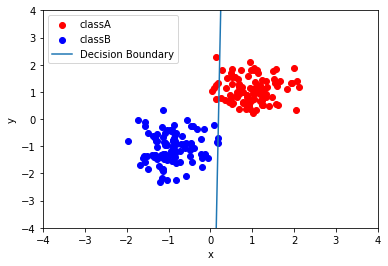

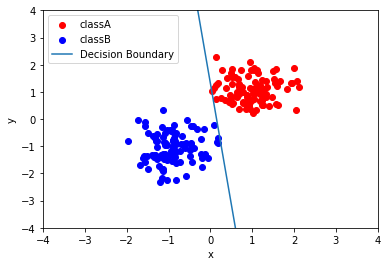

In [45]:
learning_rate = 0.1
epochs = 100

X, y_delta, y_perceptron = shuffle(data, tdata)

def perceptron(X, weights, target):
  X = X.reshape(3,1)
  return -learning_rate * (step(weights @ X) - target) @ X.T

weights = -1.5 * init_weights((1,3)) + np.array((3,0,0))

plot(classA, classB, weights)

for epoch in range(1, epochs+1):
  for i, x in enumerate(X.T):
    weights += perceptron(x, weights, y_perceptron[i])

plot(classA, classB, weights)

[[ 2.09894086 -1.25773672]]


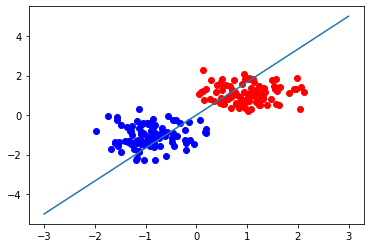

array([[0.48536197, 0.41159654]])

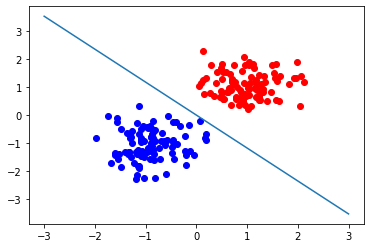

In [46]:
def plot_no_bias(classA, classB, weights):
  x = np.linspace(-3, 3, 100)
  y = -weights[0][0]/weights[0][1] * x

  plt.scatter(classA[0,:], classA[1,:], c="red")
  plt.scatter(classB[0,:], classB[1,:], c="blue")
  plt.plot(x, y)
  plt.show()


learning_rate = 0.0001
epochs = 1000

weights = -1.5 * init_weights((1,2)) + np.array((3,0))
print(weights)
plot_no_bias(classA, classB, weights)

## batch
X_nbias = X[0:2,:]
y_nbias = y_delta

for epoch in range(1, epochs+1):
  ## online
  #for i, x in enumerate(X_nbias.T):
  #  x = x.reshape(2,1)
  #  weights += delta(x, weights, y_delta[i], learning_rate)
  ## batch
  weights += delta(X_nbias, weights, y_delta)

display(weights)
plot_no_bias(classA, classB, weights)
